In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def conv(s):
    idx = -1
    for i,c in enumerate(s):
        if c!='.' and not c.isnumeric():
            idx = i
            break
#     print(s[idx])
    unit = s[idx:].strip()
    num = float(s[:idx])
    if unit =='s':
        num=num*1000

    return num

def conv2(s):
#     idx = -1
#     for i,c in enumerate(s):
#         if c!='.' and not c.isnumeric():
#             idx = i
#             break
# #     print(s[idx])
#     unit = s[idx:].strip()
#     num = float(s[:idx])
#     if unit =='s':
#         num=num*1000

    # num = int(s.strip())

    return s

def pt_values(yvals,ax,**kwargs):
    N = len(yvals)
    X2 = np.sort(yvals)
    F2 = np.array(np.arange(N))/float(N)
    
    s = kwargs.pop('start',0)
    e = kwargs.pop('end',1)
    
    start=int(len(F2)*s)
    end=int(len(F2)*e)
    
    xvals = X2[start:end]
    yvals = F2[start:end]
    ax.plot(xvals,yvals,**kwargs)
    
def pt(fn, ax, **kwargs):
    df = pd.read_csv(fn, header=None)
    df['float_lat'] = df[0].apply(conv)
    yvals = df['float_lat'].to_numpy()
    pt_values(yvals, ax, **kwargs)
    
def get_box(fn, **kwargs):
    df = pd.read_csv(fn, header=None)
    df['float_lat'] = df[0].apply(conv)
    return df['float_lat']

def get_box2(fn, **kwargs):
    df = pd.read_csv(fn, header=None)
    df['int_reject'] = df[3].apply(conv2)
    return df['int_reject']

    

(75.0, 275.0)

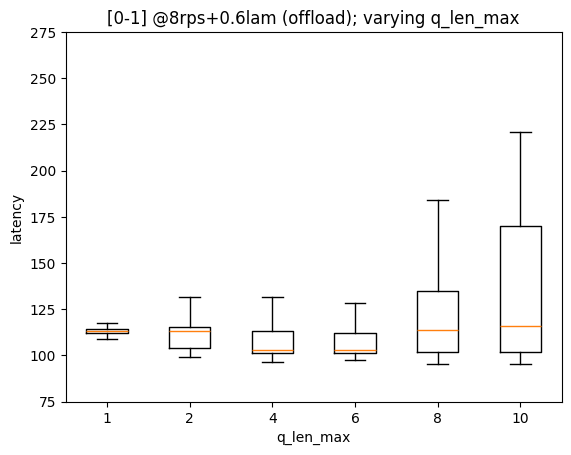

In [31]:
fig, ax = plt.subplots()
# pols = ['roundrobin','federated', 'roundrobinlatency']
# pols = ['base']
qlens = [1, 2, 4, 6, 8, 10]

percentiles = []

for qlen in qlens:
    total = []
    for i in range(0, 10):
        if i in [0,1]:
            box = get_box(f'./microbenchmark-data-federated/10node/2node_8rps_0.6lam_qlen/cluster_exp_fiblocal_p66_multiskew_policy_federated_q{qlen}_reject/run_load/federated/clabcl{i}/fiblocal-profile66-p2p20ms.out')
            total = np.concatenate((total, box))

    # case = []
    
    # case.append(np.percentile(total, 50))
    # case.append(np.percentile(total, 75))
    # case.append(np.percentile(total, 90))
    # case.append(np.percentile(total, 99))

    # percentiles.append(case)

    percentiles.append(total)
# for qlen in qlens:
    # plt.plot(percentiles)

ax.boxplot(percentiles, showfliers=False)

labels = []
for qlen in qlens:
    labels.append("q_len_max="+str(qlen))
# ax.legend(labels)
ax.set_ylabel('latency')
ax.set_xlabel('q_len_max')
ax.set_xticks([i for i in range(1,7)], qlens)
# ax.axvline(x=200, color='black')
ax.set_title('[0-1] @8rps+0.6lam (offload); varying q_len_max')
ax.set_ylim(75,275)
# ax.set_xlim(0,250)

Text(0.5, 1.0, '[0-1] @8rps+0.6lam (offload); varying q_len_max')

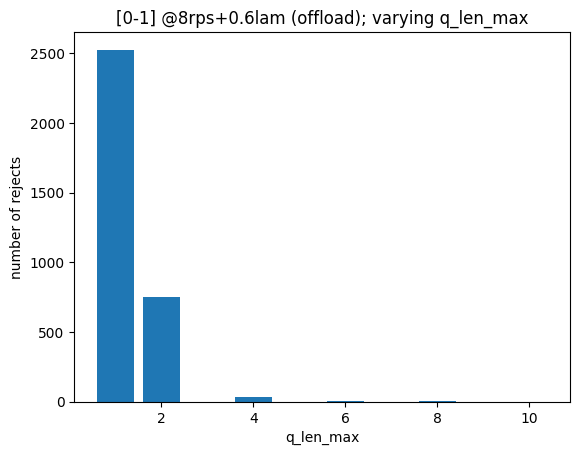

In [32]:
fig, ax = plt.subplots()
# pols = ['roundrobin','federated', 'roundrobinlatency']
# pols = ['base']
qlens = [1, 2, 4, 6, 8, 10]

rejects = []

for qlen in qlens:
    total = 0
    for i in range(0, 10):
        if i in [0,1]:
            box2 = get_box2(f'./microbenchmark-data-federated/10node/2node_8rps_0.6lam_qlen/cluster_exp_fiblocal_p66_multiskew_policy_federated_q{qlen}_reject/run_load/federated/clabcl{i}/fiblocal-profile66-p2p20ms.out')
            total += np.count_nonzero(box2)

    # case = []
    
    # case.append(np.percentile(total, 50))
    # case.append(np.percentile(total, 75))
    # case.append(np.percentile(total, 90))
    # case.append(np.percentile(total, 99))

    # percentiles.append(case)

    rejects.append(total)
# for qlen in qlens:
    # plt.plot(percentiles)

ax.bar(qlens, rejects)

labels = []
for qlen in qlens:
    labels.append("q_len_max="+str(qlen))
# ax.legend(labels)
ax.set_ylabel('number of rejects')
ax.set_xlabel('q_len_max')
# ax.set_xticks([i for i in range(1,7)], qlens)
# ax.axvline(x=200, color='black')
ax.set_title('[0-1] @8rps+0.6lam (offload); varying q_len_max')
# ax.set_ylim(75,275)
# ax.set_xlim(0,250)

(75.0, 175.0)

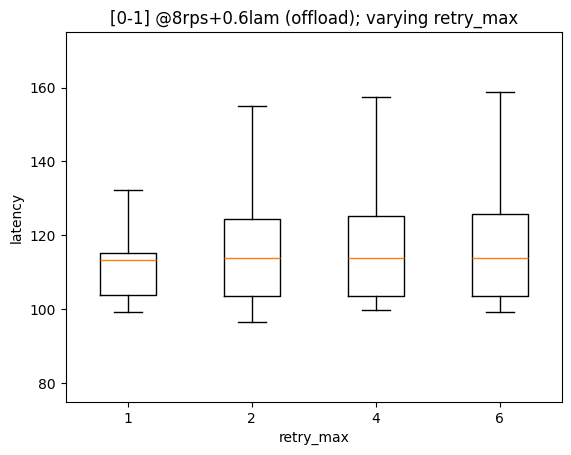

In [30]:
fig, ax = plt.subplots()
# pols = ['roundrobin','federated', 'roundrobinlatency']
# pols = ['base']
retries = [1, 2, 4, 6]

percentiles = []

for retry in retries:
    total = []
    for i in range(0, 10):
        if i in [0,1]:
            box = get_box(f'.//microbenchmark-data-federated/10node/2node_8rps_0.6lam_retry/cluster_exp_fiblocal_p66_multiskew_policy_federated_r{retry}/run_load/federated/clabcl{i}/fiblocal-profile66-p2p20ms.out')
            total = np.concatenate((total, box))

    # case = []
    
    # case.append(np.percentile(total, 50))
    # case.append(np.percentile(total, 75))
    # case.append(np.percentile(total, 90))
    # case.append(np.percentile(total, 99))

    # percentiles.append(case)

    percentiles.append(total)
# for qlen in qlens:
    # plt.plot(percentiles)

ax.boxplot(percentiles, showfliers=False)

labels = []
for retry in retries:
    labels.append("retry_max="+str(retry))
# ax.legend(labels)
ax.set_ylabel('latency')
ax.set_xlabel('retry_max')
ax.set_xticks([i for i in range(1,5)], retries)
# ax.axvline(x=200, color='black')
ax.set_title('[0-1] @8rps+0.6lam (offload); varying retry_max')
ax.set_ylim(75,175)
# ax.set_xlim(0,250)